## Problem:
Bahsis İle Odenen Hesap arasında Korelasyon var mı?

Bahşiş veri seti:

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [4]:
import seaborn as sns
import pandas as pd
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,14.97,1.01,Female,No,Sun,Dinner,2
1,7.02,1.66,Male,No,Sun,Dinner,3
2,14.01,3.50,Male,No,Sun,Dinner,3
3,17.06,3.31,Male,No,Sun,Dinner,2
4,17.37,3.61,Female,No,Sun,Dinner,4


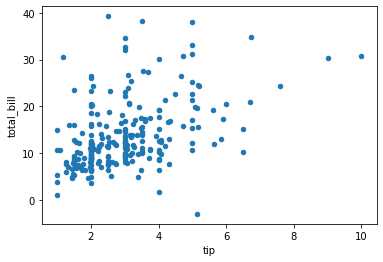

In [9]:
df.plot.scatter("tip","total_bill");
## Tip arttıkça hesap artmis

#### Varsayım Kontrolü

In [10]:
from scipy.stats import shapiro

In [11]:
# 2  değişken için ilgili test istatistikleri
test_istatistigi, pvalue = shapiro(df["tip"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["total_bill"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.9073, p-değeri = 0.0000


2 degisken için de normallik varsayımının sağlanmadığını görüyoruz.
Yani örnek dağılım ile teorik normal dağılım birbirine benzemiyor demiş oluyoruz.

###### Öncelikle sağlanıyormuş gibi yaparak parametrik test yapılır. 
###### Daha sonra Non-parametrik testi yapılarak her koşulda karşılaşılan senaryoda bu korelasyon incelemes yapılır. 

#### Hipotez Testi

##### Korelasyon Katsayısı

In [13]:
df["tip"].corr(df["total_bill"])

0.44362654305917903

In [14]:
df["tip"].corr(df["total_bill"], method = "spearman") #degiskenler arası pozitif orta yönlü bir ilişki var

0.47840852330002187

##### Korelasyonun Anlamlılığı Testi

In [16]:
from scipy.stats.stats import pearsonr

In [17]:
test_istatistigi, pvalue = pearsonr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.4436, p-değeri = 0.0000


###### Degiskenler arası anlamlı bir ilişki yok diyen H0 hipotezini reddetmektedir.

##### Nonparametrik Hipotez Testi

In [18]:
from scipy.stats import stats
stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.47840852330002187, pvalue=2.3232643717153163e-15)

In [19]:
test_istatistigi, pvalue = stats.spearmanr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.4784, p-değeri = 0.0000


In [20]:
test_istatistigi, pvalue = stats.kendalltau(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.3449, p-değeri = 0.0000


##### İki değişken arasındaki ilişkiyi, yönünü, şiddetini, ve bu ilişki anlamlı mı bunları test ettik. İki değişken arasındaki ilişki korelasyon testleriyle test ettik. Fakat öncesinde varsayımları inceledik. Varsayım sağlanıyorsa Pearson, sağlanmıyorsa Spearmanr korelasyon katsayısını kulllanacağımızı ifade ettik. Buna yönelik, H0 hipotezi reddedilir. Ve anlamlı ve pozitif yönde bir ilişki vardır. 